In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import fft

In [29]:
plt.rcParams['font.size'] = 14

In [30]:
# Load the CO2 data of MID into a DataFrame
df = pd.read_csv(
    'https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_mid_surface-flask_1_ccgg_month.txt',
    delimiter="\s+",skiprows=54, names=['site',	'year',	'month',	'value'])

In [31]:
# Convert 'year' and 'month' to datetime format
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1)).dt.to_period('M')

In [32]:
df = df.set_index('date')

In [33]:
df['months'] = [x.n for x in (df.index-df.index[0])]

In [34]:
df

,site,year,month,value,months
date,,,,,
1985-05,MID,1985,5,350.28,0
1985-06,MID,1985,6,348.82,1
1985-07,MID,1985,7,347.17,2
1985-08,MID,1985,8,344.69,3
1985-09,MID,1985,9,342.39,4
...,...,...,...,...,...
2022-08,MID,2022,8,415.60,447
2022-09,MID,2022,9,414.46,448
2022-10,MID,2022,10,416.29,449


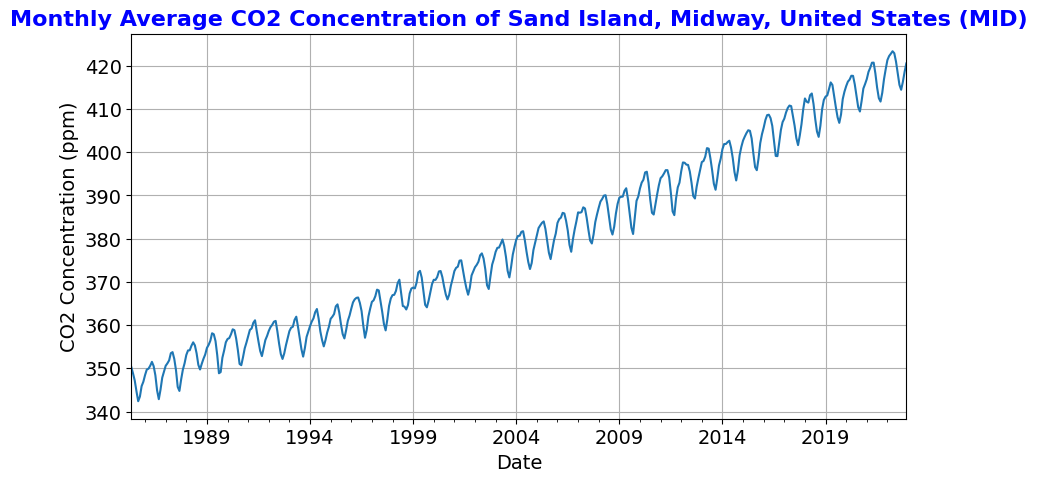

In [35]:
df['value'].plot(figsize=(10, 5), title='Monthly Average CO2 Concentration of Sand Island, Midway, United States (MID)', grid=True)
plt.xlabel('Date')
plt.ylabel('CO2 Concentration (ppm)')

# Increase the font size and make the title bold and blue
plt.title('Monthly Average CO2 Concentration of Sand Island, Midway, United States (MID)', fontsize=16, fontweight='bold', color='blue')

plt.show()

In [36]:
num_data_points = len(df)
print(f"Number of data points: {num_data_points}")

Number of data points: 452


In [37]:
from fft import discrete_transform
import pandas as pd

# Load data from a URL into a pandas DataFrame
url = 'https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_mid_surface-flask_1_ccgg_month.txt'
df = pd.read_csv(url, delimiter="\s+", skiprows=54, names=['site', 'year', 'month', 'value'])

# Assuming your complex data is in the 'value' column
data_vector = df['value']

# Use the discrete_transform function
result_dft = discrete_transform(data_vector)

# Display the result or use it as needed
#print("Discrete Fourier Transform Result:", result_dft)


In [38]:
# Get the frequencies corresponding to the DFT
N = len(result_dft)
sampling_rate = 1/12  # Monthly data, so sampling rate is 1/12 samples per year
frequencies = np.fft.fftfreq(N, d=sampling_rate)


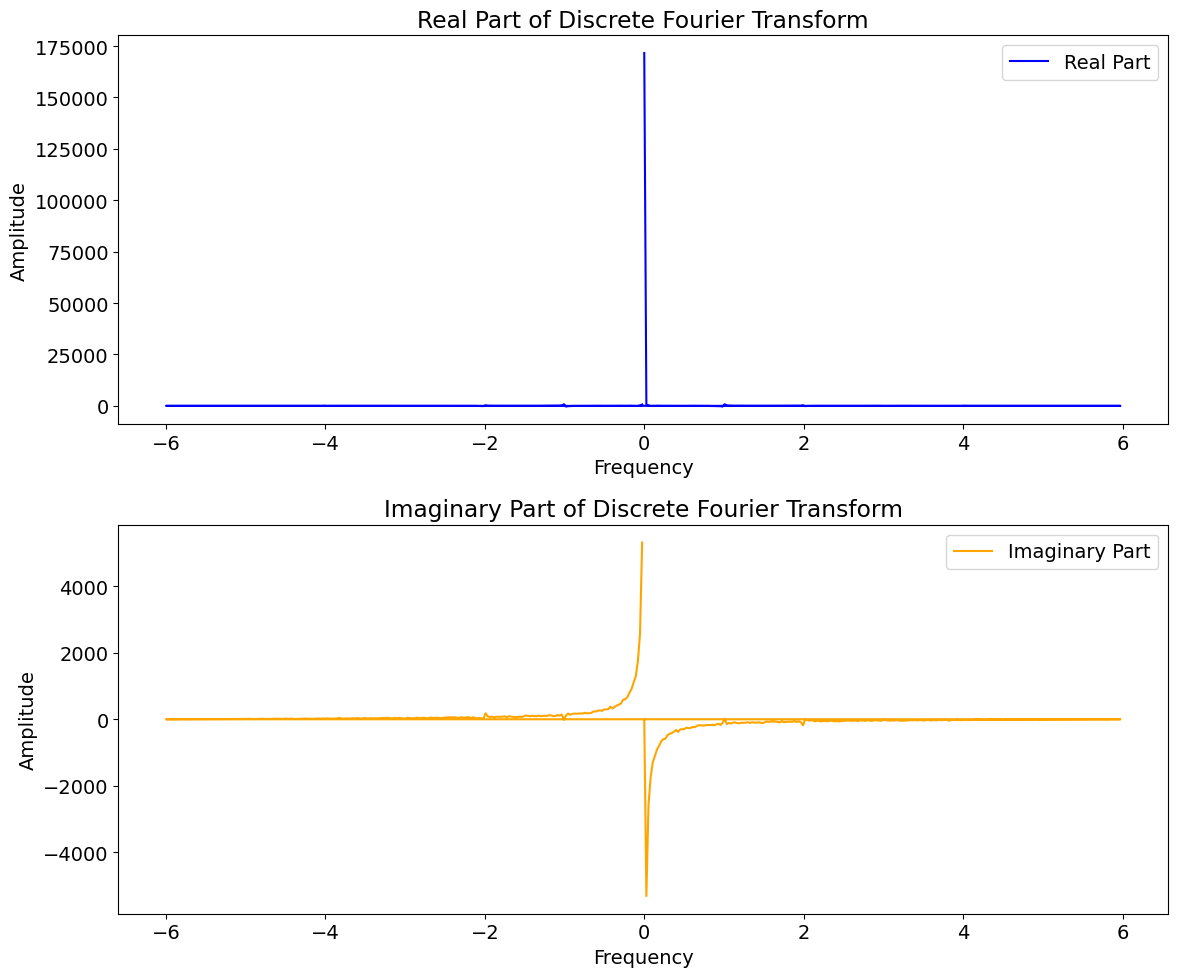

In [39]:
# Plot the real and imaginary parts of the DFT with increased spacing
plt.figure(figsize=(12, 10))

# Plot the real part
plt.subplot(2, 1, 1)
plt.plot(frequencies, result_dft.real, label='Real Part', color='blue')
plt.title('Real Part of Discrete Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()

# Add some vertical spacing
plt.subplots_adjust(hspace=0.5)

# Plot the imaginary part
plt.subplot(2, 1, 2)
plt.plot(frequencies, result_dft.imag, label='Imaginary Part', color='orange')
plt.title('Imaginary Part of Discrete Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

In [41]:
from fft import fft

# Convert 'value' column to a NumPy array before slicing
cut_data = df['value'].to_numpy()[:256]
X = fft(cut_data)


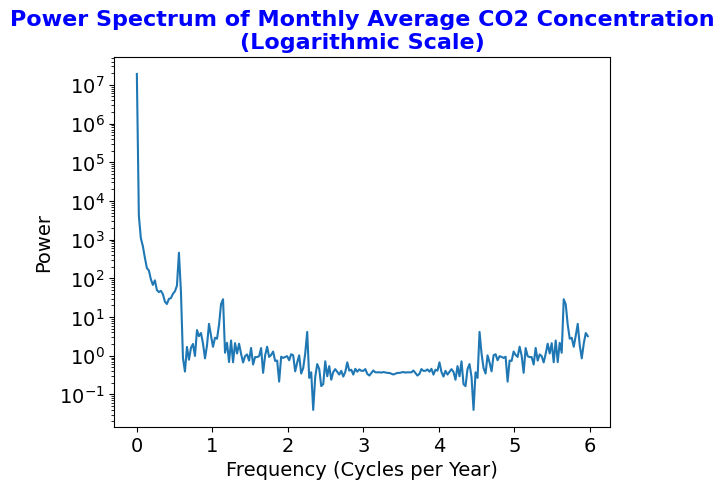

In [42]:
# Plot the power spectrum on a logarithmic scale
plt.plot(frequencies[:N//2], np.abs(X[:N//2])**2/N)
plt.yscale("log")

# Add axis labels
plt.xlabel('Frequency (Cycles per Year)')
plt.ylabel('Power')

plt.title('Power Spectrum of Monthly Average CO2 Concentration\n(Logarithmic Scale)', fontsize=16, fontweight='bold', color='blue')

plt.show()

In [43]:
Heavyside = np.append(np.zeros_like(X[:50]), np.ones_like(X[50:]))

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


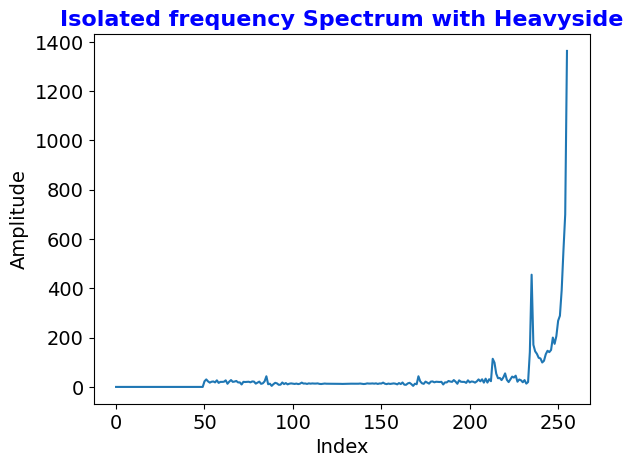

In [44]:
plt.plot(Heavyside*np.abs(X))
# Add axis labels
plt.xlabel('Index')
plt.ylabel('Amplitude')

plt.title('Isolated frequency Spectrum with Heavyside', fontsize=16, fontweight='bold', color='blue')

plt.show()

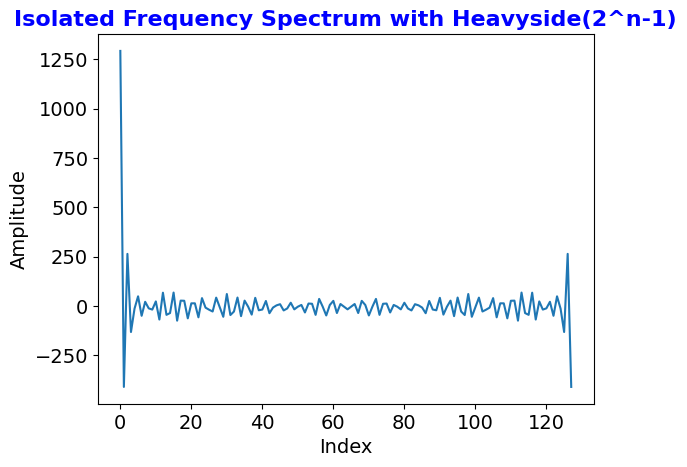

In [45]:
plt.plot(fft(Heavyside[:128]*np.abs(X[:128])))
plt.xlabel('Index')
plt.ylabel('Amplitude')

plt.title('Isolated Frequency Spectrum with Heavyside(2^n-1)', fontsize=16, fontweight='bold', color='blue') 
# We have used n=8, so our actual dataset= 256
plt.show()

In [46]:
def ifft(x):
    from numpy import conj, divide

    # Conjugate the complex numbers
    x = np.conj(x)

    # Forward FFT
    X = fft(x)

    # Conjugate the complex numbers again
    X = np.conj(X)

    # Scale the numbers
    X = X / len(X)

    # Perform the inverse FFT
    result = np.fft.ifft(X)

    return result


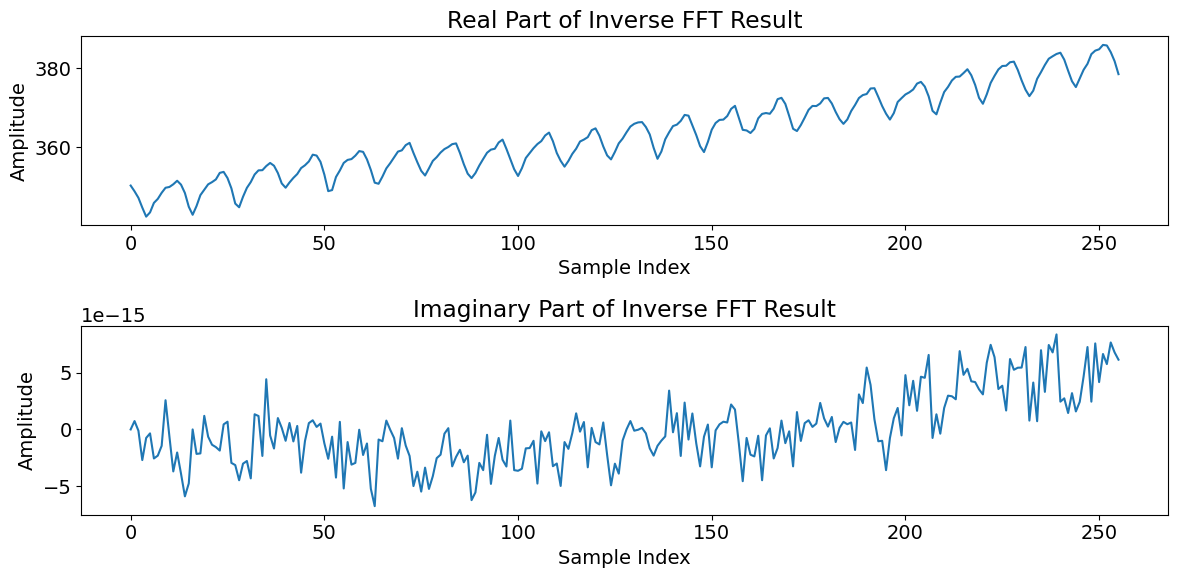

In [47]:
import matplotlib.pyplot as plt
result = np.fft.ifft(X)

# Assuming 'result_ifft' is the output of your ifft function
plt.figure(figsize=(12, 6))

# Plot the real part
plt.subplot(2, 1, 1)
plt.plot(result.real)
plt.title('Real Part of Inverse FFT Result')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Plot the imaginary part
plt.subplot(2, 1, 2)
plt.plot(result.imag)
plt.title('Imaginary Part of Inverse FFT Result')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


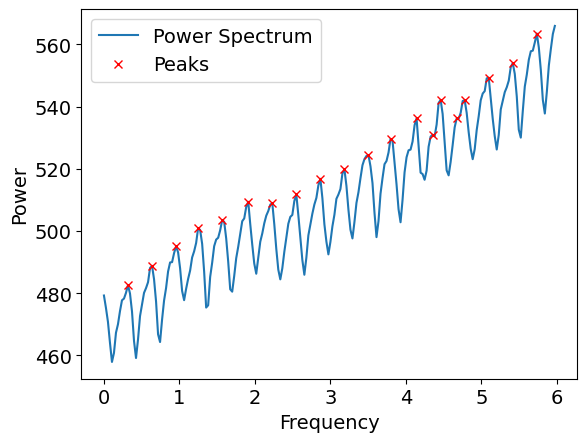

Peak Frequencies: [0.31858407 0.63716814 0.95575221 1.24778761 1.56637168 1.91150442
 2.2300885  2.54867257 2.86725664 3.18584071 3.50442478 3.79646018
 4.14159292 4.3539823  4.46017699 4.67256637 4.77876106 5.09734513
 5.4159292  5.73451327]


In [48]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

X = fft(cut_data)
power_spectrum = np.abs(cut_data[:len(frequencies)//2])**2 / len(cut_data)

# Find peaks in the power spectrum
peak_indices, _ = find_peaks(power_spectrum)

# Get corresponding frequencies of the peaks
peak_frequencies = frequencies[peak_indices]

# Plot the power spectrum with identified peaks
plt.plot(frequencies[:len(frequencies)//2], power_spectrum, label='Power Spectrum')
plt.plot(peak_frequencies, power_spectrum[peak_indices], 'rx', label='Peaks')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend()
plt.show()

# Display the identified peak frequencies
print("Peak Frequencies:", peak_frequencies)
